In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from IPython.display import Image
from sklearn.model_selection import cross_val_predict
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stars.csv')
print(df)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


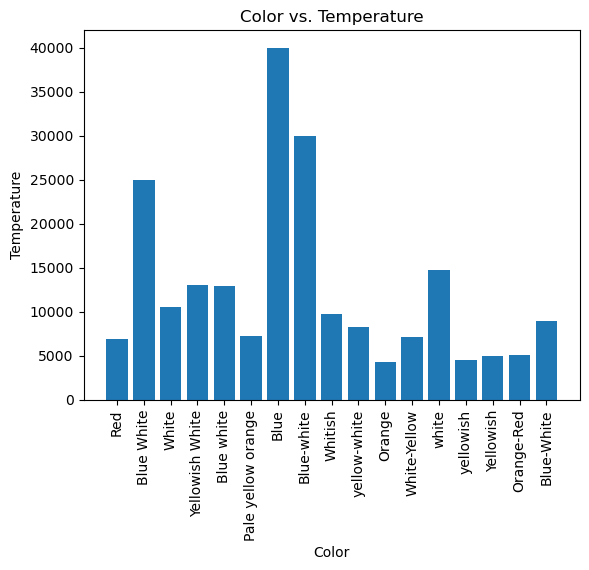

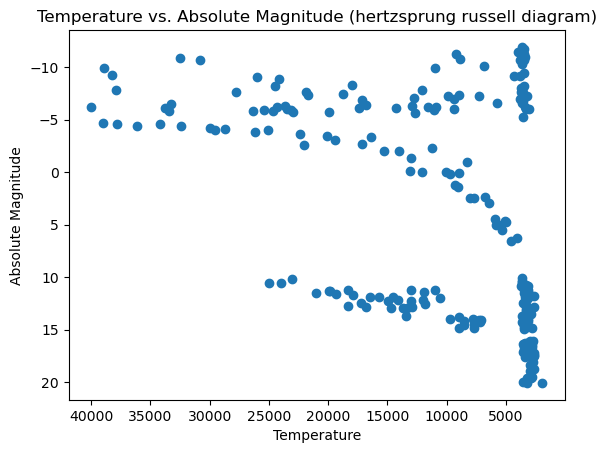

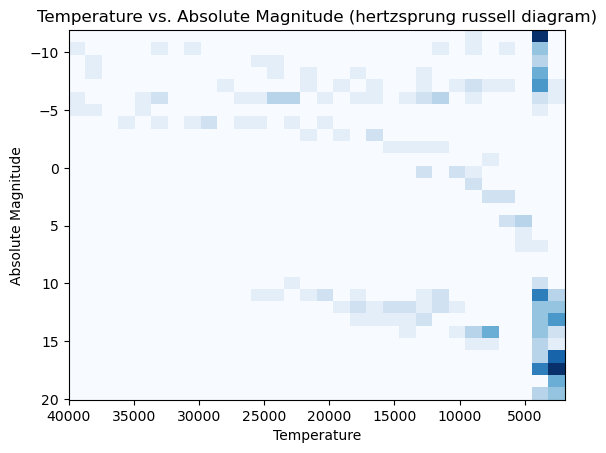

In [3]:
# Bar Graph comparing color to Tempature
plt.bar(df['Color'], df['Temperature'])
plt.xlabel('Color')
plt.ylabel('Temperature')
plt.title('Color vs. Temperature')
plt.xticks(rotation=90)
plt.show()





#hertzsprung russell diagram
plt.scatter(df['Temperature'], df['A_M'])
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title('Temperature vs. Absolute Magnitude (hertzsprung russell diagram)')
plt.gca().invert_yaxis()  # invert the y-axis
plt.gca().invert_xaxis() 
plt.show()

x_bins = 30
y_bins = 30

# create the 2D histogram plot
plt.hist2d(df['Temperature'], df['A_M'], bins=[x_bins, y_bins], cmap='Blues')
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title('Temperature vs. Absolute Magnitude (hertzsprung russell diagram)')

plt.gca().invert_yaxis()  
plt.gca().invert_xaxis()

plt.show()




In [4]:
label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Spectral_Class'] = label_encoder.fit_transform(df['Spectral_Class'])
X = df.drop(['Type'], axis=1)
y = df['Type']


scaler = StandardScaler()
X = scaler.fit_transform(X)



In [5]:
dtc = DecisionTreeClassifier(random_state=42)
y_pred = cross_val_predict(dtc, X, y, cv=10)
print('Decision Tree Classifier accuracy:', accuracy_score(y, y_pred))
print('Decision Tree Classifier precision:', precision_score(y, y_pred, average='weighted'))



Decision Tree Classifier accuracy: 0.9958333333333333
Decision Tree Classifier precision: 0.9959349593495935


In [6]:
rfc = RandomForestClassifier(random_state=42)
y_pred = cross_val_predict(rfc, X, y, cv=5)
print('Random Forest Classifier accuracy:', accuracy_score(y, y_pred))
print('Random Forest Classifier precision:', precision_score(y, y_pred, average='weighted'))

Random Forest Classifier accuracy: 0.9916666666666667
Random Forest Classifier precision: 0.9917682926829269


In [7]:
mlp = MLPClassifier(random_state=42)
y_pred = cross_val_predict(mlp, X, y, cv=5)
print('Multi-Layer Perceptron Classifier accuracy:', accuracy_score(y, y_pred))
print('Multi-Layer Perceptron Classifier precision:', precision_score(y, y_pred, average='weighted'))

C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron Classifier accuracy: 0.9458333333333333
Multi-Layer Perceptron Classifier precision: 0.9460984169081162


C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
